In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! zip -s- "/content/drive/My Drive/DATA-475/plant-seedlings-classification.zip" -O plant-seedlings-classification.zip
! unzip plant-seedlings-classification.zip -d plant-seedlings-classification

Streaming output truncated to the last 5000 lines.
  inflating: plant-seedlings-classification/test/b1cd2a91e.png  
  inflating: plant-seedlings-classification/test/b215531dd.png  
  inflating: plant-seedlings-classification/test/b2706e2b3.png  
  inflating: plant-seedlings-classification/test/b29339405.png  
  inflating: plant-seedlings-classification/test/b30ab4659.png  
  inflating: plant-seedlings-classification/test/b31292706.png  
  inflating: plant-seedlings-classification/test/b341d0aab.png  
  inflating: plant-seedlings-classification/test/b39c71707.png  
  inflating: plant-seedlings-classification/test/b3d6fdb80.png  
  inflating: plant-seedlings-classification/test/b3e08b037.png  
  inflating: plant-seedlings-classification/test/b47691c08.png  
  inflating: plant-seedlings-classification/test/b4c3df835.png  
  inflating: plant-seedlings-classification/test/b4f7c9214.png  
  inflating: plant-seedlings-classification/test/b573b7a56.png  
  inflating: plant-seedlings-classifica

In [4]:
import os
import warnings
warnings.filterwarnings("ignore")

labels = os.listdir("plant-seedlings-classification/train")
print(labels)

['Common wheat', 'Sugar beet', 'Fat Hen', 'Maize', 'Cleavers', 'Charlock', 'Common Chickweed', 'Small-flowered Cranesbill', 'Scentless Mayweed', 'Loose Silky-bent', 'Black-grass', 'Shepherds Purse']


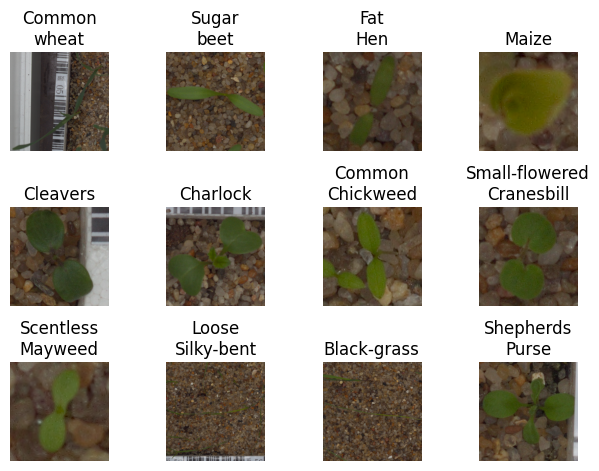

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


fig, axs = plt.subplots(nrows=3, ncols=4)
fig.tight_layout()
for index, label in enumerate(labels):
    image = np.random.choice(os.listdir(f"plant-seedlings-classification/train/{label}"))
    im = Image.open(f"plant-seedlings-classification/train/{label}/{image}")
    ind = int(index/4), index % 4
    axs[ind].imshow(im)
    axs[ind].set_title(label.replace(" ", "\n"))
    axs[ind].axis("off")

In [6]:
from fastai.vision.all import *
from fastai.metrics import accuracy

# Use from_folder factory method from ImageDataBunch to create a dataset
# configure:
#   path
#   size
#   ds_tfms, to flip the image randomly and allow fliping vertically
#   valid_pct， 20%


data = ImageDataLoaders.from_folder(
    "/content/plant-seedlings-classification",
    train="train",
    valid='test',
    batch_tfms=aug_transforms(do_flip=True, flip_vert=True),
    item_tfms = Resize(224),
    valid_pct=.2,
    size=224,
    bs=64,
)

In [7]:
# create a CNN learner named "learner" with resnet34
learner = cnn_learner(data, models.resnet34, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 316MB/s]


SuggestedLRs(valley=0.001737800776027143)

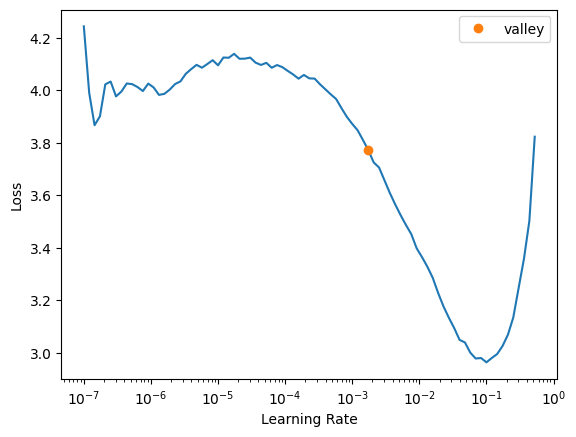

In [8]:
# find a learning rate
learner.lr_find()

In [9]:
# fit one cycle
lr = learner.recorder.lr
learner.fit_one_cycle(8, lr)

epoch,train_loss,valid_loss,accuracy,time
0,3.056854,1.625214,0.476534,01:19
1,1.853057,0.871704,0.697653,01:26
2,1.229479,0.660181,0.761733,01:19
3,0.907176,0.584275,0.788809,01:23
4,0.730559,0.538687,0.800542,01:19
5,0.671548,0.498832,0.814079,01:25
6,0.608968,0.492868,0.811372,01:18
7,0.577713,0.493736,0.805957,01:21


In [10]:
# interpret the result and see the most confused classess
interp = ClassificationInterpretation.from_learner(learner)
interp.most_confused(min_val=2)

[('Black-grass', 'Loose Silky-bent', 22),
 ('test', 'Loose Silky-bent', 17),
 ('Common Chickweed', 'test', 14),
 ('Small-flowered Cranesbill', 'test', 12),
 ('test', 'Fat Hen', 12),
 ('Loose Silky-bent', 'Black-grass', 11),
 ('Shepherds Purse', 'test', 10),
 ('test', 'Small-flowered Cranesbill', 10),
 ('Cleavers', 'test', 9),
 ('Sugar beet', 'test', 8),
 ('Sugar beet', 'Fat Hen', 7),
 ('Charlock', 'test', 6),
 ('Fat Hen', 'test', 6),
 ('test', 'Charlock', 6),
 ('test', 'Cleavers', 6),
 ('Loose Silky-bent', 'test', 4),
 ('test', 'Common Chickweed', 4),
 ('test', 'Sugar beet', 4),
 ('Black-grass', 'test', 3),
 ('Maize', 'test', 3),
 ('Scentless Mayweed', 'Shepherds Purse', 3),
 ('Shepherds Purse', 'Scentless Mayweed', 3),
 ('test', 'Shepherds Purse', 3),
 ('Black-grass', 'Common wheat', 2),
 ('Charlock', 'Cleavers', 2),
 ('Common wheat', 'Loose Silky-bent', 2),
 ('Common wheat', 'test', 2),
 ('Maize', 'Common wheat', 2),
 ('Scentless Mayweed', 'test', 2),
 ('test', 'Black-grass', 2)]

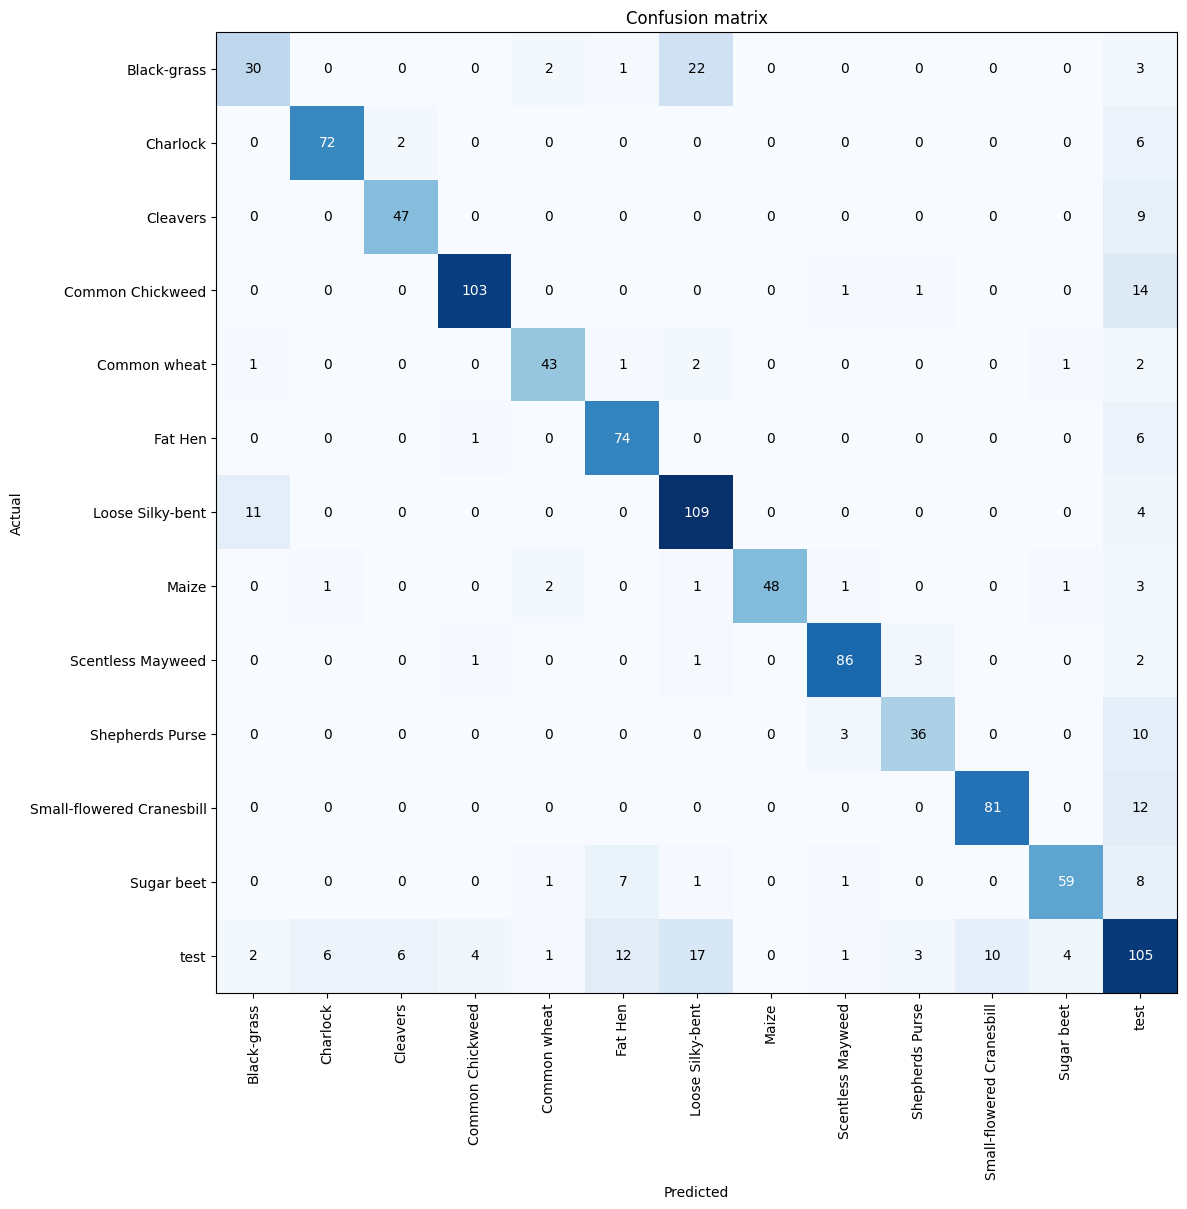

In [11]:
interp.plot_confusion_matrix(figsize=(12, 12))